#### 결정트리 알고리즘 기반 모델
- 데이터셋의 피처(특성)을 기준으로 데이터를 분류하는 알고리즘
- 질문방식으로 Yes/No 결과에 따라 데이터셋이 분리가 됨
- 장점 : 스케일링이나 정규화 불필요 ==> 성능의 영향이 없음, 쉬운 알고리즘
- 단점 : 과대적합 ===> 해결을 위한 많은 하이퍼파라미터 존재!!
- 다른 ML 알고리즘에 비해 성능이 좋지 않음 ==> 단! 여러개의 DT가 모이면 성능 강해짐
    * 앙상블에 주로 사용됨!

[1] 모듈 로딩 및 데이터 준비

In [19]:
# 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [20]:
# 데이터 로딩
featureDF, targetSR= load_iris(as_frame=True, return_X_y=True)

print(f'{featureDF.shape}, {featureDF.ndim}D')
print(f'{targetSR.shape}, {targetSR.ndim}D')

(150, 4), 2D
(150,), 1D


[2] 학습용 데이터셋 준비

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [22]:
X_train, X_test, y_train, y_test=train_test_split(featureDF, targetSR, random_state=10, stratify=targetSR)

In [23]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')

print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (112, 4), 2D
X_test : (38, 4), 2D
y_train : (112,), 1D
y_test : (38,), 1D


[3] 학습 - 기본 학습

In [24]:
# 모델 인스턴스 생성
dt_model=DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [25]:
# 모델 파라미터 : 학습fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}개')
print(f'[dt_model.max_features] {dt_model.max_features_}개')
print(f'[dt_model.feature_importances_] {dt_model.feature_importances_}')

[dt_model.classes_] [0 1 2]
[dt_model.n_classes_] 3개
[dt_model.max_features] 4개
[dt_model.feature_importances_] [0.05727497 0.         0.06844775 0.87427728]


- 성능 체크

In [26]:
# 학습용 데이터셋에 대한 성능
train_score=dt_model.score(X_train, y_train)

# 테스트용 데이터셋에 대한 성능
test_score=dt_model.score(X_test, y_test)

In [27]:
print(f'train_score : test_score = {train_score} : {test_score} ')

train_score : test_score = 1.0 : 0.9736842105263158 


[4] 교차검증 => 데이터셋 부족 해결 및 과대적합을 회피

In [28]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [29]:
# 교차검증 준비 => 모델 인스턴스, trainDS, cv=5[기본]
dt_model2=DecisionTreeClassifier(random_state=1)
result=cross_validate(dt_model2, X_train, y_train, return_train_score=True, return_estimator=True)

In [30]:
# dict => DataFrame
resultDF=pd.DataFrame(result)
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.001993,0.001993,DecisionTreeClassifier(random_state=1),0.956522,1.0
1,0.001992,0.002152,DecisionTreeClassifier(random_state=1),0.956522,1.0
2,0.002053,0.002383,DecisionTreeClassifier(random_state=1),0.954545,1.0
3,0.003245,0.001015,DecisionTreeClassifier(random_state=1),0.863636,1.0
4,0.001005,0.003817,DecisionTreeClassifier(random_state=1),0.909091,1.0


[5] 성능 향상 위한 튜닝 => 하이퍼파라미터 설정
- 단점 : 과대적합
    * max_depth, min_samples_leaf, .... ==> 많음

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# 하이퍼파라미터 dict 생성
params={'max_depth':[4,3,2,1],
        'min_samples_leaf':[5,3,2]}

In [33]:
gscv=GridSearchCV(DecisionTreeClassifier(), param_grid=params, refit=True, return_train_score=True)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [34]:
# 모델 파라미터
print(f'[dt_model.params_] {gscv.best_params_}')
print(f'[dt_model.best_params_] {gscv.best_params_}')
print(f'[dt_model.best_estimator_] {gscv.best_estimator_}')
# print(f'[dt_model.cv_results_]\n {gscv.cv_results_}')

cv_resultDF=pd.DataFrame(gscv.cv_results_)

[dt_model.params_] {'max_depth': 4, 'min_samples_leaf': 2}
[dt_model.best_params_] {'max_depth': 4, 'min_samples_leaf': 2}
[dt_model.best_estimator_] DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)


In [38]:
## 가장 좋은 모델
best_model=gscv.best_estimator_
print(f'[best_model.max_depth] {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] {best_model.min_samples_leaf}')

[best_model.max_depth] 4
[best_model.min_samples_leaf] 2


In [39]:
diffscoreDF=cv_resultDF[['mean_test_score', 'mean_']]

KeyError: "['mean_'] not in index"

In [40]:
# 피쳐 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_, best_model.feature_names_in_

(array([0.01321873, 0.        , 0.59964451, 0.38713677]),
 4,
 array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'], dtype=object))

- 주요 피쳐 시각화

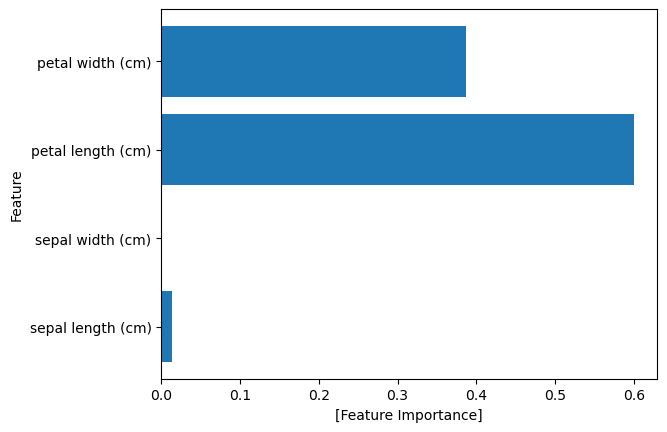

In [45]:
## (1) ㅇDT 모델을 dot포맷의 파일로 저장 ==> 
import matplotlib.pyplot as plt

plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('[Feature Importance]')
plt.ylabel("Feature")
plt.show()

- DT 그래프 시각화
    * Graphviz 프로그램(OS에 맞는 버전) 설치 + python용 패키지 graphviz 설치

In [47]:
## DT 모델을 dot포맷의 파일로 저장 ==> export_graphviz()
from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='tree.dot',
                class_names=['setosa', 'versicolor', 'verginica'],
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True)

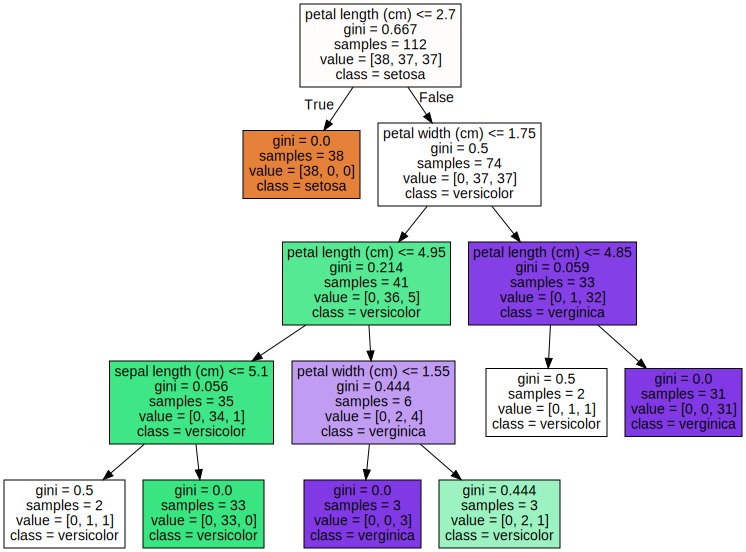

In [48]:
## (2) dot 파일 출력
import graphviz

# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data=f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

[6]  새로운 데이터  예측


In [50]:
new_data=featureDF.iloc[[0]]+0.21
new_data.shape

(1, 4)

In [51]:
best_model.predict(new_data)

array([0])

In [52]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])